# Introduction

**TEAM PITSTOP**
- **Research Question:** How does a change in gas prices affect traffic density in Istanbul?

- **Null Hypothesis:** An increase in gas prices will not have any effect in traffic density in Istanbul.

- **Alternative Hypothesis:** An increase in gas prices will lead to a decrease in traffic density in Istanbul.

- **Data collection method:** 

  - Website: The traffic density data for Istanbul was collected from the website of Istanbul Metropolitan Municipality (IBB). The specific dataset used can be accessed at the following URL: https://data.ibb.gov.tr/en/dataset/hourly-traffic-density-data-set/resource/db9c7fb3-e7f9-435a-92f4-1b917e357821?inner_span=True. The data is obtained as CSV files with requests library.

  - Website: The fuel prices data was obtained from the Energy Market Regulatory Authority (EPDK) website. The website provides information on fuel prices in Turkey. The specific webpage used to retrieve the data is: https://bildirim.epdk.gov.tr/bildirim-portal/faces/pages/tarife/petrol/illereGorePetrolAkaryakitFiyatSorgula.xhtml. The data is obtained with selenium library.

- **Data cleaning, filtering:** 
  - Some Lattitude and Longitude values are written as opposite in İBB csv files. We filtered them and changed correctly.
  - Some of links indexes are shifted, that is why we removed "Haziran2021" data.
  - Values for 2023 are mismatched which is why we cleaned the data for last 3 months. We evaluated two years' value.
  - "Adalar" district also not evaluated in this project.
  - LATITUDE, LONGITUDE values are filtered and changed as just District names. 
  - GEOHASH, MINIMUM_SPEED, MAXIMUM_SPEED values are cleaned:
    - GEOHASH is not necessary while we have LATITUDE and LONGITUDE values.
    - MINIMUM_SPEED and MAXIMUM_SPEED values are not not necessary while we have AVERAGE_SPEED values.

- **Aim:** The study aims to draw conclusions about the effects of gas price changes on traffic density in Istanbul. 

- **Analysis and visualization:** 
  - In **Stage 1**, we used matplotlib.pyplot library to create a plot graph for the traffic level in each district in Europian side and Anatolian side, change in petrol prices, petrol prices vs traffic levels in each district in Europian side and Anatolian side and also just for Europian side and Anatolian side.
    - Pdf file of traffic level: traffic/
      - anadolu/
      - avrupa/
    - Pdf file of petrol prices:
      - ANADOLU_petrol_prices.pdf
      - AVRUPA_petrol_prices.pdf
    - Pdf file of price_vs_traffic:
      - anadolu/
      - avrupa/
      - ANADOLU_price_vs_traffic_graph.pdf
      - AVRUPA_price_vs_traffic_graph.pdf

  - In **Stage 2**, we focus on analyzing the correlation between traffic levels and petrol prices for different cities or districts. We perform this analysis separately for the European side and Anatolian side, as well as for all cities combined.

  - In **Stage 3**, we focus on analyzing the relationship between petrol prices and average traffic speeds for the European and Anatolian sides. Then code calculates the sum of traffic results for each day with the specified date range and adjusts the traffic results based on the continent.
    - A linear regression model using Lasso regularization is applied to analyze the relationship between petrol prices and average traffic speeds.

  - In **Stage 4**, we focus on performing hypothesis testing to determine the significance of the relationship between petrol prices and average traffic speeds for the European and Anatolian sides. Then conducts a hypothesis test for each petrol price and continent to evaluate the presence of a relationship.
    - The code utilizes the ordinary least squares (OLS) regression model to fit the data and obtain regression results. It retrieves the p-value from the regression results, which represents the probability of observing a relationship between the petrol price and average speed by chance. 
    - If the p-value is less than the significance level (alpha), the null hypothesis is rejected, indicating a relationship between the variables. On the other hand, if the p-value is greater than or equal to alpha, the null hypothesis is accepted, suggesting no significant relationship.

- **Conclusion:**

  - Based on the results in Stage 4, following conclusions about the relationship between petrol prices and average traffic speeds in Istanbul are drawn:

    - For the European side ('AVRUPA'):
      - Gasoline: The p-value (1.2668149717927922e-06) is less than the significance level (alpha = 0.05). So, we reject the null hypothesis and conclude that there is a significant relationship between gasoline prices and average speed in the European side of Istanbul.
      - Diesel: The p-value (4.514771077171582e-06) is less than alpha. Therefore, we reject the null hypothesis and conclude that there is a significant relationship between diesel prices and average speed in the European side.

    - For the Anatolian side ('ANADOLU'):
      - Gasoline: The p-value (2.7192036590267928e-15) is less than alpha. Thus, we reject the null hypothesis and conclude that there is a significant relationship between gasoline prices and average speed in the Anatolian side of Istanbul.
      - Diesel: The p-value (7.821532833678752e-15) is less than alpha. Then, we reject the null hypothesis and conclude that there is a significant relationship between diesel prices and average speed in the Anatolian side.

  - **In conclusion,** the results shows a serious relationship between petrol prices (both gasoline and diesel) and average traffic speeds in both the European and Anatolian sides of Istanbul. Specifically, as petrol prices increase, there is a tendency for average traffic speeds to change. Findings support the alternative hypothesis and suggest that an increase in petrol prices leads to the decrease in traffic density in Istanbul.

**It is very important to remember that the data and analysis used in this study served as the a basis for these results. The availability of public transportation, road infrastructure, accidents, individual driving habits and a few more elements that may affect changes in traffic density. Further research and analysis would provide a more accurate understanding about the relationship!**

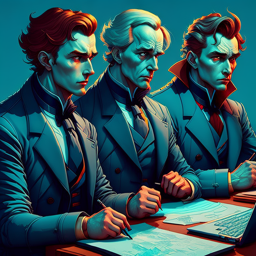

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import os
from datetime import datetime, timedelta
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Control Data Processing

**First, we will examine how much lines of data we lost, while processing RAW csv files to DISTRICTS.csv files from IBB.**

- Check ibb_data/
                    Ocak_2020
                    .........
                    Ocak_2023

In [ ]:
# Path to ibb_data/
ibb_raw_path = "ibb_data/"

# Set counter
RAW_COUNT = 0
RAW_LOST_FILE = []

for j in range(2020, 2023):
    for i in months:
        filename = ibb_raw_path + i + str(j) + '.csv'
        # Open the CVS file
        try:
          with open(filename, 'r', encoding='utf-8') as file:
            # Read all the lines in the file
            lines = file.readlines()

            # Count the number of lines, and add to RAW_COUNT
            RAW_COUNT += len(lines)
        except Exception as e:
          RAW_LOST_FILE.append(e)

print("Number of lines in raw data: ", RAW_COUNT)
print("Number of csv file gone (Jan 2020 to Dec 2022): ", len(RAW_LOST_FILE))

Number of lines in raw data:  59541218
Number of csv file gone (Jan 2020 to Dec 2022):  0


- Check ibb_data_byDay/
                          Avcılar
                          .........
                          Zeytinburnu

In [ ]:
# Directory of map_location_byDay/
ibb_file_path = "map_location_byDay/"

LAST_COUNT = 0
LAST_LOST_FILE = []

for city in ist:
  ibb_data_path_temp = ibb_file_path + city +'.csv'
  try:
    with open(ibb_data_path_temp, 'r', encoding="utf-8") as file:

      # Read all the lines in the file
      lines = file.readlines()
      # Count the number of lines, and add to LAST_COUNT
      LAST_COUNT += len(lines)

  except Exception as y:
    LAST_LOST_FILE.append(y)

print("Number of lines in processed data: ", LAST_COUNT)
print("Number of csv file gone: ", len(LAST_LOST_FILE))

Number of lines in processed data:  1097
Number of csv file gone:  37


- Check the RAW counter
- Check the LAST counter
- Check the difference between them
- Calculate the error rate

In [ ]:
# Convert the number of lines to a string with thousands separators
RAW_COUNT_formatted = '{:,}'.format(RAW_COUNT)
LAST_COUNT_formatted = '{:,}'.format(LAST_COUNT)
DIFFERENCE_formatted = '{:,}'.format(RAW_COUNT - LAST_COUNT)

# Calculate the error rate
error_rate = ((RAW_COUNT - LAST_COUNT) / RAW_COUNT) * 100

print("Number of lines in raw data:", RAW_COUNT_formatted)
print("Number of lines in processed data:", LAST_COUNT_formatted)
print("Difference of lines in raw data - processed data :", DIFFERENCE_formatted)
print("Error Rate: {:.6f} %".format(error_rate))

print("\nSuccesfully processed: {:.6f} %".format(100 - error_rate), "of lines")

Number of lines in raw data:  59,541,218
Number of lines in processed data:  55,756,629
Difference of lines in raw data - processed data :  3,784,589
Error Rate: 6.356251 %

Succesfully processed: 93.643749 % of lines


# Exploratory Data Analysis - Stage 1

**Lets examine how prices of Gasoline and Diesel changed over the years**

In [ ]:
# Add petrol_prices directory
save_directory = 'figures/petrol_prices'
directory = 'petrol_prices'

for filename in os.listdir(directory):
    df = pd.read_csv(os.path.join(directory, filename))
    # Convert the 'DATE' column to datetime
    df['DATE'] = pd.to_datetime(df['DATE'])

    plt.figure(figsize=(20, 10))

    # Plot gasoline and diesel prices
    plt.plot(df['DATE'], df['GASOLINE_PRICE'], label='Gasoline Price')
    plt.plot(df['DATE'], df['DIESEL_PRICE'], label='Diesel Price')

    # Set the title and labels
    plt.title(f'Daily Petrol Prices in Istanbul({filename[:-4].capitalize()})', fontsize=30)
    plt.xlabel('Date', fontsize=20)
    plt.ylabel('Price(₺)', fontsize=20)

     # Set the x-axis tick locator and formatter
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    # Set the y-axis tick locator and formatter
    ax.yaxis.set_minor_locator(plt.MultipleLocator())
    ax.yaxis.set_minor_formatter(plt.FormatStrFormatter('%.0f'))
    ax.tick_params(axis='y', which='minor', labelsize=12)


    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)

    ax.grid(which='both', linestyle='-')
    plt.legend(prop={'size': 20}, loc='upper left')

    plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2023-01-01'))
    # Save the figure as a PDF
    save_path = os.path.join(save_directory, f'{filename[:-4]}_petrol_prices.pdf')
    plt.savefig(save_path, format='pdf')
    
    plt.close()

**Lets examine how traffic level changed over three years**

In [ ]:
save_directory1 = 'figures/traffic'
directory = 'ibb_data_byDay_ANADOLU_AVRUPA'

# Loop through each region ('AVRUPA' and 'ANADOLU')
for cont in ['AVRUPA', 'ANADOLU']:
    # Create a subdirectory path for the current side
    sub_dir = os.path.join(directory, cont)
    for file_name in os.listdir(sub_dir):
        df = pd.read_csv(os.path.join(sub_dir, file_name))
        df['DATE'] = pd.to_datetime(df['DATE'])

        plt.figure(figsize=(20, 10))

        plt.plot(df['DATE'], df['RESULT'])

        plt.xlabel('Date', fontsize=20)
        plt.ylabel('Average Speed(km/h)', fontsize=20)    
        plt.title('Daily Average Speed in ' + file_name[:-4], fontsize=30)
        
        # Get the current axes and set the major and minor tick locators and formatters
        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

        ax.yaxis.set_minor_locator(plt.MultipleLocator())
        ax.yaxis.set_minor_formatter(plt.FormatStrFormatter('%.0f'))
        ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        ax.tick_params(axis='y', which='minor', labelsize=12)
        ax.tick_params(axis='y', which='major', labelsize=15)

        plt.xticks(rotation=90, fontsize=15)
        plt.yticks(fontsize=15)

        ax.grid(which='both', linestyle='-')

        # Set the x-axis limits       
        plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2023-01-01'))

        # Create the save path for the figure based on the region and file name, and create as pdf
        save_path = os.path.join(os.path.join(save_directory1, cont.lower()), file_name[:-4] + '_traffic_graph.pdf')
        plt.savefig(save_path, format='pdf')

        plt.close()   

**Lets see both of them in a plot chart in a different districts.**

In [ ]:
directory_traffic = 'ibb_data_byDay_ANADOLU_AVRUPA'
directory_price = 'petrol_prices'
save_directory2 = 'figures/price_vs_traffic'    
    
for cont1 in ['AVRUPA', 'ANADOLU']:
    # Create a subdirectory path for the current region in the traffic directory
    sub_dir1 = os.path.join(directory_traffic, cont1)
    df_price = pd.read_csv(os.path.join(directory_price, f'{cont1}.csv'))
    for file in os.listdir(sub_dir1):

        # Read the traffic data file into a DataFrame
        df_traffic = pd.read_csv(os.path.join(sub_dir1, file))
        
        # Convert the 'DATE' columns in both DataFrames to datetime format
        df_price['DATE'] = pd.to_datetime(df_price['DATE'])
        df_traffic['DATE'] = pd.to_datetime(df_traffic['DATE'])

        # Create a new figure and axis
        fig, ax1 = plt.subplots(figsize=(30, 15))

        # Plot the gasoline and diesel prices on the first axis
        ax1.plot(df_price['DATE'], df_price['GASOLINE_PRICE'], color='red', label='Gasoline Price', linewidth=2)
        ax1.plot(df_price['DATE'], df_price['DIESEL_PRICE'], color='green', label='Diesel Price', linewidth=2)

        # Set the y-axis label, tick locators, formatters, and font sizes for the first axis
        ax1.set_ylabel('Price(₺)', fontsize=40)
        ax1.yaxis.set_minor_locator(plt.MultipleLocator())
        ax1.yaxis.set_minor_formatter(plt.FormatStrFormatter('%.0f'))
        ax1.tick_params(axis='y', which='major', labelsize=30)
        ax1.tick_params(axis='y', which='minor', labelsize=25)
        ax1.grid(which='both', linestyle='-', linewidth=1)

        # Set the x-axis label, major tick locators, formatter, rotation, and font size for the first axis
        ax1.set_xlabel('Date', fontsize=40)
        ax1.xaxis.set_major_locator(mdates.MonthLocator())
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax1.tick_params(axis='x', rotation=90, labelsize=20) 

        # Create a twin axis sharing the x-axis with the first axis
        ax2 = ax1.twinx()

        # Plot the average speed on the second axis
        ax2.plot(df_traffic['DATE'], df_traffic['RESULT'], color='blue', label='Average Speed', linewidth=2)
        ax2.set_ylabel('Average Speed(km/h)', fontsize=40)

        # Set the y-axis tick locators, formatters, major locator, and font sizes for the second axis
        ax2.yaxis.set_minor_locator(plt.MultipleLocator())
        ax2.yaxis.set_minor_formatter(plt.FormatStrFormatter('%.0f'))
        ax2.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        ax2.tick_params(axis='y', which='major', labelsize=30)
        ax2.tick_params(axis='y', which='minor', labelsize=25)
        ax2.grid(which='both', linestyle=':', linewidth=1)

        # Get the lines and labels from both axes to create a combined legend
        lines = ax1.get_lines() + ax2.get_lines()
        labels = [line.get_label() for line in lines]
        ax1.legend(lines, labels, loc='upper left', fontsize=25)

        # Set the title of the plot based on the current file name
        plt.title(f'Petrol Price vs Average Speed in {file[:-4]}', fontsize=50)

        # Set the x-axis limits
        plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2023-01-01'))

        # Adjust the spacing between subplots
        plt.tight_layout()

        # Create the save path for the figure based on the region and file name and save as pdf
        save_path = os.path.join(os.path.join(save_directory2, cont1.lower()), f'{file[:-4]}_price_vs_traffic_graph.pdf')
        plt.savefig(save_path, format='pdf')

        plt.close()

**Lets see both of them in a plot chart as a whole European side and Anatolian side.**

In [ ]:
directory_traffic1 = 'ibb_data_byDay_ANADOLU_AVRUPA'
directory_price1 = 'petrol_prices'
save_directory3 = 'figures/price_vs_traffic'    
    
for cont2 in ['AVRUPA', 'ANADOLU']:
    # Dataframe for one continent
    temp_df_columns = ['DATE', 'RESULT']
    temp_traffic_df = pd.DataFrame(columns=temp_df_columns)

    # Set the start and end dates for temporary traffic data
    start_date = datetime.strptime("2020-01-01", "%Y-%m-%d")
    end_date = datetime.strptime("2022-12-31", "%Y-%m-%d")

    # Initialize the current date with start date
    current_date = start_date

    # Iterate through each date from start to end date
    while current_date <= end_date:
        formatted_date = current_date.strftime("%Y-%m-%d")
        temp_traffic_df.loc[len(temp_traffic_df)] = [formatted_date, 0.0]
        current_date += timedelta(days=1)

    # Create a subdirectory path for the current region in the traffic direc
    sub_dir2 = os.path.join(directory_traffic1, cont2)
    df_price = pd.read_csv(os.path.join(directory_price1, f'{cont2}.csv'))

    for file1 in os.listdir(sub_dir2):
        # Read the traffic data file into a DataFrame
        df_traffic1 = pd.read_csv(os.path.join(sub_dir2, file1))

        # Add the 'RESULT' column values of the current file to the temporary traffic DataFrame
        temp_traffic_df['RESULT'] += df_traffic1['RESULT']

    # Divide the 'RESULT' column values of the temporary traffic DataFrame by the number of files for the region
    if cont2 == 'AVRUPA':
        temp_traffic_df['RESULT'] = temp_traffic_df['RESULT'] / 25
    else:
        temp_traffic_df['RESULT'] = temp_traffic_df['RESULT'] / 13

    # Convert the 'DATE' columns in both DataFrames to datetime format
    df_price['DATE'] = pd.to_datetime(df_price['DATE'])
    temp_traffic_df['DATE'] = pd.to_datetime(df_traffic['DATE'])

    # Create a new figure and axis
    fig, ax1 = plt.subplots(figsize=(30, 15))

    ax1.plot(df_price['DATE'], df_price['GASOLINE_PRICE'], color='red', label='Gasoline Price', linewidth=2)
    ax1.plot(df_price['DATE'], df_price['DIESEL_PRICE'], color='green', label='Diesel Price', linewidth=2)

    # Set the y-axis label, tick locators, formatters, and font sizes for the first axis
    ax1.set_ylabel('Price(₺)', fontsize=40)
    ax1.yaxis.set_minor_locator(plt.MultipleLocator())
    ax1.yaxis.set_minor_formatter(plt.FormatStrFormatter('%.0f'))
    ax1.tick_params(axis='y', which='major', labelsize=30)
    ax1.tick_params(axis='y', which='minor', labelsize=25)
    ax1.grid(which='both', linestyle='-', linewidth=1)

    # Set the x-axis label, tick locators, formatters, rotation, and font size for the first axis
    ax1.set_xlabel('Date', fontsize=40)
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax1.tick_params(axis='x', rotation=90, labelsize=20)

    # Create a second y-axis for the average speed data
    ax2 = ax1.twinx()

    ax2.plot(temp_traffic_df['DATE'], temp_traffic_df['RESULT'], color='blue', label='Average Speed', linewidth=2)
    ax2.set_ylabel('Average Speed(km/h)', fontsize=40)

    # Set the y-axis tick locators, formatters, maximum number of ticks, and font sizes for the second axis
    ax2.yaxis.set_minor_locator(plt.MultipleLocator())
    ax2.yaxis.set_minor_formatter(plt.FormatStrFormatter('%.0f'))
    ax2.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax2.tick_params(axis='y', which='major', labelsize=30)
    ax2.tick_params(axis='y', which='minor', labelsize=25)
    ax2.grid(which='both', linestyle=':', linewidth=1)

    # Get the lines and labels from both axes to create a combined legend
    lines = ax1.get_lines() + ax2.get_lines()
    labels = [line.get_label() for line in lines]
    ax1.legend(lines, labels, loc='upper left', fontsize=25)

    plt.title(f'Petrol Price vs Average Speed in {cont2.capitalize()}', fontsize=50)

    # Set the x-axis limits
    plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2023-01-01'))

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Create the save path for the figure based on the region
    save_path = os.path.join(save_directory3, f'{cont2}_price_vs_traffic_graph.pdf')

    plt.savefig(save_path, format='pdf')

    plt.close()

# Exploratory Data Analysis - Stage 2

**Lets analyze the correlation between traffic data and gasoline/diesel prices for two continents, European side (AVRUPA) and Anatolian side (ANADOLU).**

In [ ]:
#AVRUPA-ANADOLU TRAFFIC VS GASOLINE-DIESEL PRICE
directory_traffic = 'ibb_data_byDay_ANADOLU_AVRUPA'
directory_price = 'petrol_prices'

for cont in ['AVRUPA', 'ANADOLU']:
    temp_df_columns = ['DATE', 'RESULT']
    temp_traffic_df = pd.DataFrame(columns=temp_df_columns)

    # Define the start and end dates
    start_date = datetime.strptime("2020-01-01", "%Y-%m-%d")
    end_date = datetime.strptime("2022-12-31", "%Y-%m-%d")

    # Iterate through each date with start and end dates
    current_date = start_date
    while current_date <= end_date:
        formatted_date = current_date.strftime("%Y-%m-%d")
        temp_traffic_df.loc[len(temp_traffic_df)] = [formatted_date, 0.0]
        current_date += timedelta(days=1)
        
    # Create the sub-directory path for the specific continent's traffic data
    sub_dir = os.path.join(directory_traffic, cont)
    
    # Read the price data for the continent from a CSV file
    df_price = pd.read_csv(os.path.join(directory_price, f'{cont}.csv'))
    
    # Iterate through each file in the sub-directory and calculate the sum of traffic results
    for file in os.listdir(sub_dir):
        df_traffic = pd.read_csv(os.path.join(sub_dir, file))
        temp_traffic_df['RESULT'] += df_traffic['RESULT']
    
    # Adjust the traffic results based on the continent (divide by its count)
    if cont == 'AVRUPA':
        temp_traffic_df['RESULT'] = temp_traffic_df['RESULT'] / 25
    else:
        temp_traffic_df['RESULT'] = temp_traffic_df['RESULT'] / 13
        
    # Calculate the correlation coefficient between gasoline price and average speed in the continent
    cc_gasoline = df_price['GASOLINE_PRICE'].corr(temp_traffic_df['RESULT'])
    
    # Calculate the correlation coefficient between diesel price and average speed in the continent
    cc_diesel = df_price['DIESEL_PRICE'].corr(temp_traffic_df['RESULT'])

    print(f"Correlation coefficient between gasoline price and average speed in {cont.capitalize()} is : ", cc_gasoline)
    print(f"Correlation coefficient between diesel price and average speed in {cont.capitalize()} is : ", cc_diesel)

Correlation coefficient between gasoline price and average speed in Avrupa is :  -0.14579561470937744
Correlation coefficient between diesel price and average speed in Avrupa is :  -0.13808649143177143
Correlation coefficient between gasoline price and average speed in Anadolu is :  -0.23572834843168083
Correlation coefficient between diesel price and average speed in Anadolu is :  -0.23187896017417642


**Lets analyze the correlation between traffic data and gasoline/diesel prices for all cities.**

In [ ]:
#ALL CITIES TRAFFIC VS GASOLINE-DIESEL PRICE

for cont1 in ['AVRUPA', 'ANADOLU']:
    sub_dir1 = os.path.join(directory_traffic, cont1)
    df_price = pd.read_csv(os.path.join(directory_price, f'{cont1}.csv'))
    for filename in os.listdir(sub_dir1):
        df_traffic = pd.read_csv(os.path.join(sub_dir1, filename))
        
        cc_gasoline = df_price['GASOLINE_PRICE'].corr(df_traffic['RESULT'])
        cc_diesel = df_price['DIESEL_PRICE'].corr(df_traffic['RESULT'])
        
        print(f"Correlation coefficient between gasoline price and average speed in {filename[:-4]:<13}: {cc_gasoline:<10.7f}")
        print(f"Correlation coefficient between diesel price and average speed in {filename[:-4]:<15}: {cc_diesel:<10.7f}")
        print("\n")

Correlation coefficient between gasoline price and average speed in Arnavutköy   : 0.6068405 
Correlation coefficient between diesel price and average speed in Arnavutköy     : 0.6070302 


Correlation coefficient between gasoline price and average speed in Avcılar      : -0.2057613
Correlation coefficient between diesel price and average speed in Avcılar        : -0.2000900


Correlation coefficient between gasoline price and average speed in Bahçelievler : -0.1298327
Correlation coefficient between diesel price and average speed in Bahçelievler   : -0.1274974


Correlation coefficient between gasoline price and average speed in Bakırköy     : -0.1119930
Correlation coefficient between diesel price and average speed in Bakırköy       : -0.1096240


Correlation coefficient between gasoline price and average speed in Bayrampaşa   : -0.0897850
Correlation coefficient between diesel price and average speed in Bayrampaşa     : -0.0920634


Correlation coefficient between gasoline price and

# Exploratory Data Analysis - Stage 3

**Lets analyze the relationship between petrol prices and average traffic speeds for the European side ('AVRUPA') and Anatolian side ('ANADOLU').**

In [ ]:
directory_traffic = 'ibb_data_byDay_ANADOLU_AVRUPA'
directory_price = 'petrol_prices'

for cont in ['AVRUPA', 'ANADOLU']:
    # Create a temp DataFrame for traffic data
    temp_df_columns = ['DATE', 'RESULT']
    temp_traffic_df = pd.DataFrame(columns=temp_df_columns)

    # Define the start and end dates
    start_date = datetime.strptime("2020-01-01", "%Y-%m-%d")
    end_date = datetime.strptime("2022-12-31", "%Y-%m-%d")

    # Iterate through each date within start and end dates
    current_date = start_date
    while current_date <= end_date:
        formatted_date = current_date.strftime("%Y-%m-%d")
        temp_traffic_df.loc[len(temp_traffic_df)] = [formatted_date, 0.0]
        current_date += timedelta(days=1)
        
    # Create the sub-directory path for specific continent's traffic data
    sub_dir = os.path.join(directory_traffic, cont)
    
    # Read the price data for the continent from a CSV file
    df_price = pd.read_csv(os.path.join(directory_price, f'{cont}.csv'))
    
    # Iterate through each file in the sub-directory and calculate the sum of traffic results
    for file in os.listdir(sub_dir):
        df_traffic = pd.read_csv(os.path.join(sub_dir, file))
        temp_traffic_df['RESULT'] += df_traffic['RESULT']
    
    # Adjust the traffic results based on the continent (divide by its count)
    if cont == 'AVRUPA':
        temp_traffic_df['RESULT'] = temp_traffic_df['RESULT'] / 25
    else:
        temp_traffic_df['RESULT'] = temp_traffic_df['RESULT'] / 13
        
    # Iterate through each price ('GASOLINE_PRICE' and 'DIESEL_PRICE')
    for price in ['GASOLINE_PRICE', 'DIESEL_PRICE']:    
        # Prepare the input features (X) and target variable (y) for training and testing
        y = temp_traffic_df.drop(temp_traffic_df.index[0])['RESULT']
        X = df_price.drop(df_price.index[[0, -1]])[[price]].values.reshape(-1, 1)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the Lasso regression model
        lasso = Lasso(alpha=0.1)
        lasso.fit(X_train, y_train)

        # Predict the target variable for the test data
        y_pred = lasso.predict(X_test)

        # Calculate the mean squared error (MSE) between the predicted and actual values
        mse = mean_squared_error(y_test, y_pred)
        print(f"Mean Squared Error between {price[:-6].capitalize()} price and average speed in {cont.capitalize()} is : ", mse)

        # Get the coefficients of the Lasso model
        coefficients = lasso.coef_
        print(f"Coefficients between {price[:-6].capitalize()} price and average speed in {cont.capitalize()} is : ", coefficients)
    
        print('\n')


Mean Squared Error between Gasoline price and average speed in Avrupa is :  14.83996522468998
Coefficients between Gasoline price and average speed in Avrupa is :  [-0.07721657]


Mean Squared Error between Diesel price and average speed in Avrupa is :  14.891354691704525
Coefficients between Diesel price and average speed in Avrupa is :  [-0.06092102]


Mean Squared Error between Gasoline price and average speed in Anadolu is :  11.114405001614307
Coefficients between Gasoline price and average speed in Anadolu is :  [-0.11240498]


Mean Squared Error between Diesel price and average speed in Anadolu is :  11.151433174224177
Coefficients between Diesel price and average speed in Anadolu is :  [-0.09178201]




# Exploratory Data Analysis - Stage 4

**Lets perform hypothesis testing to determine the significance of the relationship between petrol prices and average traffic speeds.**

In [ ]:
directory_traffic = 'ibb_data_byDay_ANADOLU_AVRUPA'
directory_price = 'petrol_prices'
alpha = 0.05

for cont in ['AVRUPA', 'ANADOLU']:
    # Create a temp DataFrame for traffic data
    temp_df_columns = ['DATE', 'RESULT']
    temp_traffic_df = pd.DataFrame(columns=temp_df_columns)

    # Define start and end dates
    start_date = datetime.strptime("2020-01-01", "%Y-%m-%d")
    end_date = datetime.strptime("2022-12-31", "%Y-%m-%d")

    # Iterate through each date with start and end dates
    current_date = start_date
    while current_date <= end_date:
        formatted_date = current_date.strftime("%Y-%m-%d")
        temp_traffic_df.loc[len(temp_traffic_df)] = [formatted_date, 0.0]
        current_date += timedelta(days=1)
        
    # Create the sub-directory path for the specific continent's traffic data
    sub_dir = os.path.join(directory_traffic, cont)
    
    # Read the price data for the continent from a CSV file
    df_price = pd.read_csv(os.path.join(directory_price, f'{cont}.csv'))
    
    # Iterate through each file in the sub-directory and calculate the sum of traffic results
    for file in os.listdir(sub_dir):
        df_traffic = pd.read_csv(os.path.join(sub_dir, file))
        temp_traffic_df['RESULT'] += df_traffic['RESULT']
    
    # Adjust the traffic results based on the continent (divide by its count)
    if cont == 'AVRUPA':
        temp_traffic_df['RESULT'] = temp_traffic_df['RESULT'] / 25
    else:
        temp_traffic_df['RESULT'] = temp_traffic_df['RESULT'] / 13
        
    # Iterate through the petrol prices ('GASOLINE_PRICE' and 'DIESEL_PRICE')
    for price in ['GASOLINE_PRICE', 'DIESEL_PRICE']:
        # Prepare the input variables for the linear regression model
        y = temp_traffic_df.drop(temp_traffic_df.index[0])['RESULT']
        X = df_price.drop(df_price.index[[0, -1]])[[price]].values.reshape(-1, 1)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Add a constant term to the independent variable matrix
        X_with_constant = sm.add_constant(X)

        # Fit an ordinary least squares (OLS) regression model
        model = sm.OLS(y, X_with_constant)
        results = model.fit()

        # Retrieve the F-statistic and p-value from the regression results
        f_statistic = results.fvalue
        p_value = results.f_pvalue

        # Print the p-value and interpret the hypothesis test results
        print("P-Value:", p_value)
        if p_value < alpha:
            print("Reject the null hypothesis!")
            print(f"There is a relation between {price[:-6].capitalize()} price and average speed in {cont.capitalize()}.")
        else:
            print("Null hypothesis is true!")
            print(f"There is no relation between {price[:-6].capitalize()} price and average speed in {cont.capitalize()}.")
        print('\n')

P-Value: 1.2668149717927922e-06
Reject the null hypotesis!
There is a relation between Gasoline price and average speed in Avrupa.


P-Value: 4.514771077171582e-06
Reject the null hypotesis!
There is a relation between Diesel price and average speed in Avrupa.


P-Value: 2.7192036590267928e-15
Reject the null hypotesis!
There is a relation between Gasoline price and average speed in Anadolu.


P-Value: 7.821532833678752e-15
Reject the null hypotesis!
There is a relation between Diesel price and average speed in Anadolu.


